Modules

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras


Loading the Pre-Trained VGG-16 Model from TensorFlow Library

In [5]:
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model))

preprocess_input = tf.keras.applications.vgg16.preprocess_input

vgg_model.summary()

<class 'keras.engine.functional.Functional'>
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (Ma

In [6]:
train_data = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

validation_data = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_data = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

Loading Train, Validation and Test Images

In [10]:
BATCH_SIZE = 32
PIC_SIZE = 224

train = train_data.flow_from_directory("./train", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="categorical", color_mode='rgb', shuffle=True)
validation = test_data.flow_from_directory("./validation", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="categorical", color_mode='rgb', shuffle=True)
test = test_data.flow_from_directory("./test", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="categorical", color_mode='rgb', shuffle=True)

print(train.class_indices)
print(validation.class_indices)
print(test.class_indices)

Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 900 images belonging to 3 classes.
{'Cat': 0, 'Dog': 1, 'Human': 2}
{'Cat': 0, 'Dog': 1, 'Human': 2}
{'Cat': 0, 'Dog': 1, 'Human': 2}


Adding Every Single Layer of the VGG-16 Model Except the Last One

In [11]:
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

Desactivating Every Trainable Layer, so The New Last One Layer is Going to be Retrained

In [12]:
for layer in model.layers:
    layer.trainable = False
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [13]:
model.add(tf.keras.layers.Dense(3, activation='softmax'))

Compiling and Retraining the Model

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['acc']
)
    
history = model.fit(train,   
    epochs=10, validation_data=validation)

print("Model Trained")

Epoch 1/10
94/94 [==============================] - 258s 3s/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 2/10
94/94 [==============================] - 259s 3s/step - loss: 0.0019 - acc: 0.9993 - val_loss: 0.0066 - val_acc: 0.9967
Epoch 3/10
94/94 [==============================] - 266s 3s/step - loss: 0.0066 - acc: 0.9973 - val_loss: 0.0030 - val_acc: 0.9983
Epoch 4/10
94/94 [==============================] - 807s 9s/step - loss: 0.0033 - acc: 0.9987 - val_loss: 1.4930e-04 - val_acc: 1.0000
Epoch 5/10
94/94 [==============================] - 253s 3s/step - loss: 3.6102e-04 - acc: 1.0000 - val_loss: 1.0256e-04 - val_acc: 1.0000
Epoch 6/10
94/94 [==============================] - 263s 3s/step - loss: 1.3362e-04 - acc: 1.0000 - val_loss: 5.6124e-05 - val_acc: 1.0000
Epoch 7/10
94/94 [==============================] - 275s 3s/step - loss: 4.4424e-05 - acc: 1.0000 - val_loss: 4.1807e-05 - val_acc: 1.0000
Epoch 8/10
94/94 [==============================] - 273

In [18]:
model.evaluate(test)

29/29 [==============================] - 68s 2s/step - loss: 0.0500 - acc: 0.9911


[0.05002624914050102, 0.9911110997200012]

Testing the Model

1/1 [==============================] - 0s 164ms/step
[[7.7421811e-09 1.3710679e-15 1.0000000e+00]]
Human


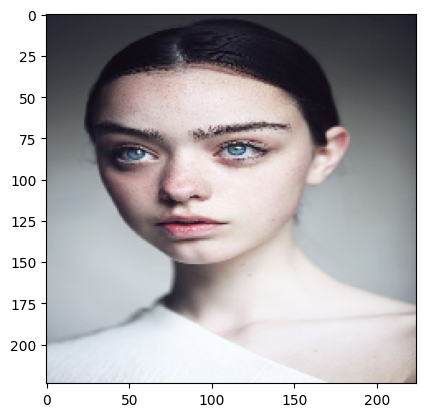

In [28]:
test_img = tf.keras.preprocessing.image.load_img("./1 (2734).JPG", target_size=(224, 224), color_mode='rgb')

plt.imshow(test_img)


X = tf.keras.preprocessing.image.img_to_array(test_img)
X = np.expand_dims(X, axis = 0)

prediction = np.vstack([X])

result = model.predict(prediction)

print(result)

arg_max_result = np.argmax(result)

if arg_max_result == 0 :
    print("Cat")
elif arg_max_result == 1 :
    print("Dog")
elif arg_max_result == 2 :
    print("Human")


Saving the Model

In [13]:
model.save("dog_cat_person.h5")